# HW 4


We will train Logistic Regression, which was the 2nd topic of Lecture 4.

Instead of the Iris dataset, we will use load the Digits dataset using "sklearn.datasets.load_digits()".
You'll use "X = digits["data"]" and "y = digits["target"]" to load images (=features) and their true labels.

Use the seed 0 everywhere.

1. Plot the first 100 images (with 10 images per row) as you did with MNIST. This dataset is  different from MNIST in sizes, number of examples, values, etc. You should modify the plotting function to accommodate the differences.

2. Randomly split the data into 80% training data and 20% testing data. Keep this split fixed.

We will try two different regularizers (l2 and l1) separately.

First use LogisticRegression(multi_class="multinomial",solver="lbfgs", penalty="l2", C=C, random_state=0, max_iter=1000)

What does this do? Comment on the choice of arguments above.
Here C are the value you are going to provide as the regularization weight, similar to HW4-1.

3. For each value of Cs = [1E-5,1E-4,1E-3,1E-2,1E-1,1E0]

(a) instantiate LogisticRegression
(b) measure 4-fold cross_validation error

Report the cross-validation errors. Which C value has the smallest validation error?

4. Now use the hyperparameter to retrain the model from scratch using all training data. Report the train and test error of this final model.

5. Repeat 3 with LogisticRegression(..., penalty="l1", C=C, random_state=0, max_iter=1000, solver='saga')

6. Repeat 4 with LogisticRegression(..., penalty="l1", C=C, random_state=0, max_iter=1000, solver='saga')

### 0. Generate Data and Imports


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
import sklearn.datasets
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(0)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
# Obtaining Data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]

#digits = sklearn.datasets.load_digits()
#X, y = digits["data"], digits["target"]

### 1. Plotting MNIST Data


In [3]:
## Plotting multiple images
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

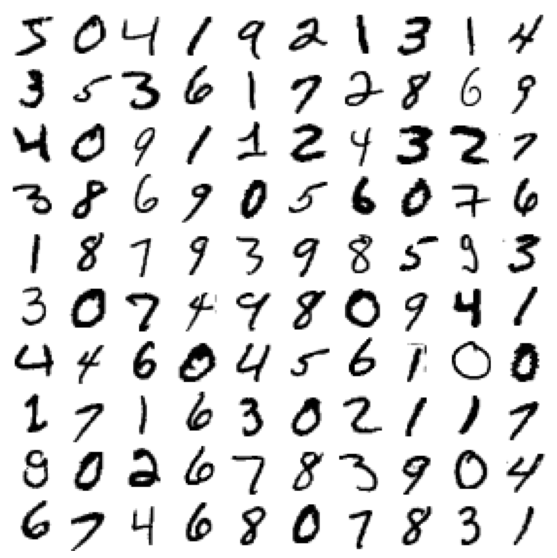

In [4]:
plt.figure(figsize=(10, 10))
example_images = X[:100]
plot_digits(example_images, images_per_row= 10)
#save_fig("more_digits_plot")
plt.show()

### 2. Splitting Train and Test data

1. Randomly split the data into 80% training data and 20% testing data. 

In [5]:
# Training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#X_full_train, y_full_train = X_train, y_train # Remember the full training set

### 2. Logistic Regression

We will try two different regularizers (l2 and l1) separately.

First use LogisticRegression(multi_class="multinomial",solver="lbfgs", penalty="l2", C=C, random_state=0, max_iter=1000)

What does this do? Comment on the choice of arguments above.
Here C are the value you are going to provide as the regularization weight, similar to HW4-1.

*  max_iter=1000
  * The maximum number of iterations the regressor will run is 1000. Set at 1000 for performance purposes.
*  multi_class = multinomial
  * This allows the classifier to be multiclass. We can now classify all 10 numbers. 
*  solver= 'lbfgs'
  * We now use the lbfgs solver for the regression, as described by https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html - "lbfgs". Works for multinomial classification.
*  penalty="l2"
  * The penalty makes it so that the Regressor gets closer to the local minimum.
*  learning_rate="constant"
*  random_state=0 
  * Random state 
*  C = C
  * C is the regularization weight that is ouor hyperparameter that we are optimizing. 




In [ ]:
from sklearn.linear_model import LogisticRegression
C = 1

log_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", penalty="l2", C=C, random_state=0, max_iter=1000)
log_reg.fit(X_train, y_train)

### 3. Search for Optimal Values of C





For each value of Cs = [1E-5,1E-4,1E-3,1E-2,1E-1,1E0]

     1. instantiate LogisticRegression
     2. measure 4-fold cross_validation error

Report the cross-validation errors. Which C value has the smallest validation error?


In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from tabulate import tabulate
from sklearn.model_selection import cross_val_score

C_grid = [1E-5,1E-4,1E-3,1E-2,1E-1,1E0]
best_C_l2 = -np.inf
score_C_l2 = -np.inf

best_C_l1 = -np.inf
score_C_l1 = -np.inf

for C in C_grid:
    log_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", penalty="l2", C = C, random_state=0, max_iter=1000)
    train_cross_val = cross_val_score(log_reg, X_train, y_train, cv=4, scoring="accuracy") 

    avg = np.average(train_cross_val) # Avg Cross val score

    if avg > score_C_l2:
      best_C_l2 = C 

print('Best C value for L2:', best_C_l2)

for C in C_grid:
    log_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", penalty="l1", C = C, random_state=0, max_iter=1000)
    train_cross_val = cross_val_score(log_reg, X_train, y_train, cv=4, scoring="accuracy") 

    avg = np.average(train_cross_val) # Avg Cross val score

    if avg > score_C_l1:
      best_C_l1 = C 

print('Best C value for L1:', best_C_l2)


### 4 - 6. L1 and L2 predictions 



L2 Predictions:

In [ ]:
log_reg_l2 = LogisticRegression(multi_class="multinomial",solver="lbfgs", penalty="l2", C = 0.01, random_state=0, max_iter=1000) 
log_reg_l2.fit(X_train, y_train) 

train_final_l2= log_reg_l2.predict(X_train) 
test_final_l2 = log_reg_l2.predict(X_test) 



L1 Predictions:

In [ ]:
log_reg_l1 = LogisticRegression(multi_class="multinomial",solver="saga", penalty="l1", C = .1, random_state=0, max_iter=1000) 
log_reg_l1.fit(X_train, y_train) 

train_final_l1 = log_reg_l1.predict(X_train) 
test_final_l1 = log_reg_l1.predict(X_test) 

Tabulating final

In [ ]:
train_mse_lbfgs = mean_squared_error(y_train, train_final_l2) 
test_mse_lbfgs = mean_squared_error(y_test, test_final_l2)


train_mse_saga = mean_squared_error(y_train, train_final_l1) 
test_mse_saga = mean_squared_error(y_test, test_final_l1) 

results = []
results.append(["l1", train_mse_saga, test_mse_saga])
results.append(["l2", train_mse_lbfgs, test_mse_lbfgs])

col_heads = ["Penalty", "Train MSE", "Test MSE"]
print(tabulate(results, headers = col_heads))